In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sn_dat = open("sn.dat", 'r')

SN = sn_dat.readlines()

sn_dat.close()

SN_arr = np.zeros((2, 16))
Noise = np.zeros((1, 16))

i = 0

for line in SN:
    string = line
    _, JD, Mag, dMag = line.split()
    if JD == "JD":
        continue
    SN_arr[0][i] = JD; SN_arr[1][i] = Mag; Noise[0][i] = dMag
    i += 1

In [5]:
def linear_interpolation(pos, x1, x2, y1, y2):
    w1 = (x2 - pos) / (x2 - x1)
    w2 = (pos - x1) / (x2 - x1)
    
    return w1 * y1 + w2 * y2

In [6]:
n = (SN_arr[0][15] - SN_arr[0][0]) / 101

result = np.zeros((2, 100))
cnt = 0
x = SN_arr[0][0]
x += n

for _ in range(100):
    result[0][_] = x
    
    if (x > SN_arr[0][cnt + 1]):
        cnt += 1
        if cnt == 15:
            x = SN_arr[0][15]
    
    x1 = SN_arr[0][cnt]; y1 = SN_arr[1][cnt]
    x2 = SN_arr[0][cnt+1]; y2 = SN_arr[1][cnt+1]
    result[1][_] = linear_interpolation(x, x1, x2, y1, y2)
    x += n

In [7]:
f = open("result_hw7", 'w')

data = "index\tJD\t\t\t\t\tMag\n"
f.write(data)

for j in range(1, 100):
    data = "%.2d\t\t%f\t\t%f\n" % (j, result[0][j - 1], result[1][j - 1])
    f.write(data)

f.close()

C:\Users\AGN\AppData\Local\Temp\ipykernel_15652\3212200122.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


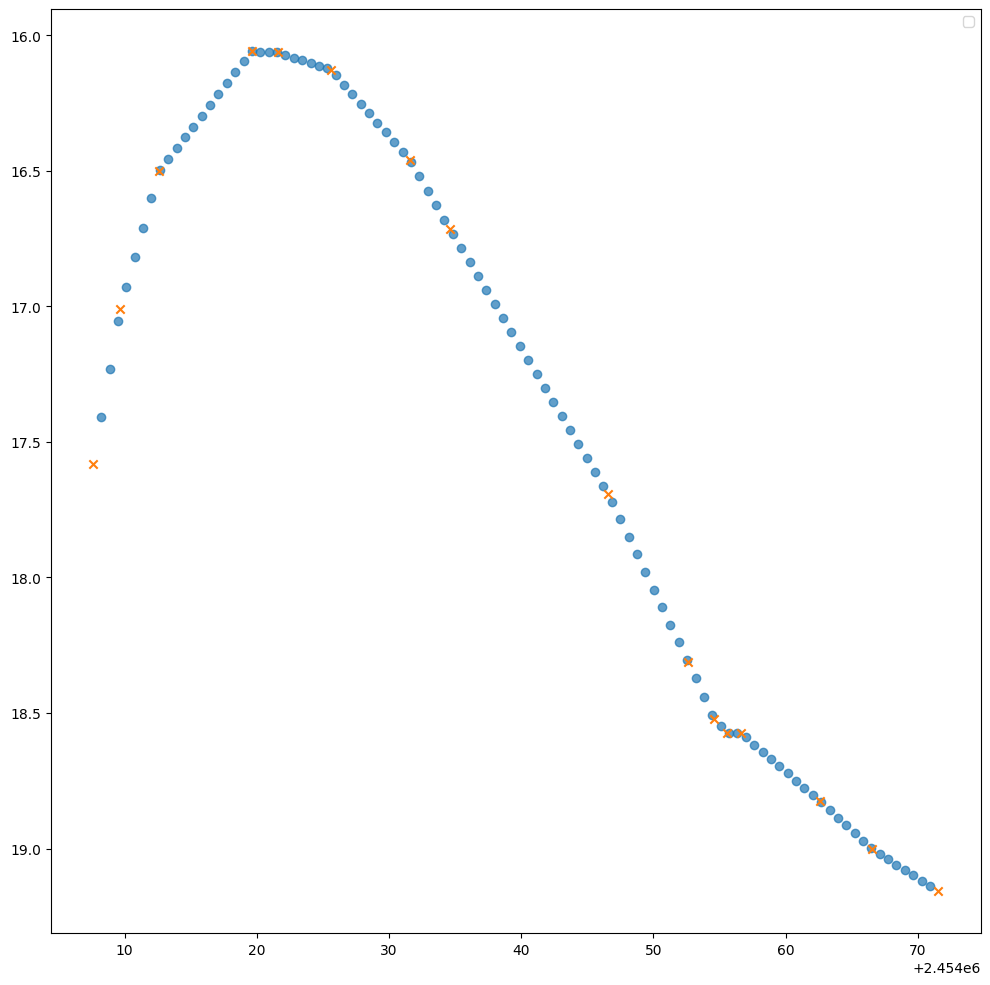

In [8]:
plt.figure(figsize=(12, 12))
plt.gca().invert_yaxis()
plt.scatter(result[0], result[1], marker='o', alpha=0.7)
plt.scatter(SN_arr[0], SN_arr[1], marker='x')
plt.legend()

In [9]:
# when data has noise (dMag)
SN_arr_noise = np.zeros((2,16))
SN_arr_noise = SN_arr
SN_arr_noise[1] += Noise[0]

In [10]:
print(SN_arr_noise)

[[2.45400760e+06 2.45400966e+06 2.45401261e+06 2.45401960e+06
  2.45402158e+06 2.45402560e+06 2.45403158e+06 2.45403460e+06
  2.45404659e+06 2.45405263e+06 2.45405459e+06 2.45405560e+06
  2.45405660e+06 2.45406258e+06 2.45406658e+06 2.45407156e+06]
 [1.76010000e+01 1.70280000e+01 1.65170000e+01 1.60730000e+01
  1.60790000e+01 1.61400000e+01 1.64750000e+01 1.67290000e+01
  1.77430000e+01 1.83380000e+01 1.85470000e+01 1.86090000e+01
  1.86040000e+01 1.88570000e+01 1.90660000e+01 1.93150000e+01]]


In [11]:
result_n = np.zeros((2, 100))
cnt = 0
x = SN_arr_noise[0][0]
x += n

for _ in range(100):
    result_n[0][_] = x
    
    if (x > SN_arr_noise[0][cnt + 1]):
        cnt += 1
        if cnt == 15:
            x = SN_arr_noise[0][15]
    
    x1 = SN_arr_noise[0][cnt]; y1 = SN_arr_noise[1][cnt]
    x2 = SN_arr_noise[0][cnt+1]; y2 = SN_arr_noise[1][cnt+1]
    result_n[1][_] = linear_interpolation(x, x1, x2, y1, y2)
    x += n

In [12]:
f = open("result_hw7_version_noise", 'w')

data = "index\tJD\t\t\t\t\tMag\n"
f.write(data)

for j in range(1, 100):
    data = "%.2d\t\t%f\t\t%f\n" % (j, result_n[0][j - 1], result_n[1][j - 1])
    f.write(data)

f.close()

C:\Users\AGN\AppData\Local\Temp\ipykernel_15652\2073410376.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


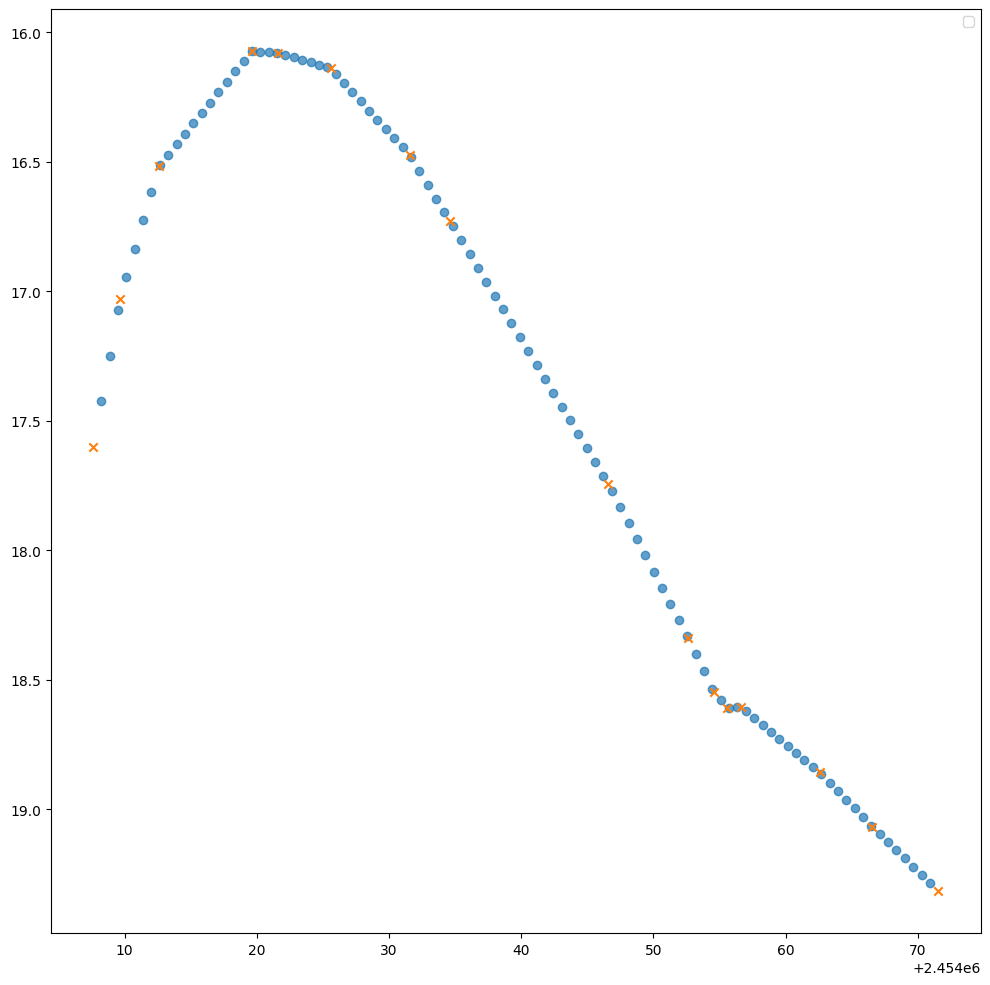

In [13]:
plt.figure(figsize=(12, 12))
plt.gca().invert_yaxis()
plt.scatter(result_n[0], result_n[1], marker='o', alpha=0.7)
plt.scatter(SN_arr_noise[0], SN_arr_noise[1], marker='x')
plt.legend()

In [14]:
# result 차이 비교(noise 유무에 따른 비교)

mse = np.mean(np.square(result[1] - result_n[1]))

print(mse)

0.001641961108957747


비교 결과
MSE 방법을 이용하여 두 보간값의 경향성을 비교한 결과
~0.0066 정도로 0에 가까운 값을 보였다.
따라서 linear interpolation은 noise에 대하여 낮은 민감도를 보인다고 할 수 있다.